In [1]:
%matplotlib inline
import pandas as pd

/Users/bricerandolph/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None)

# Illustrate Perceptron algorithm for classification on Iris

In [3]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
# Extract first 100 class labels that correspond to the 50 Iris-setosa and 50 Iris-versicolor flowers
# Convert class labels into the two integer class labels 1 (versicolor) and -1 (setosa) that we assign to vector y
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1 , 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [6]:
# extract sepal length and petal length
X = df.iloc[0:100, [0,2]].values

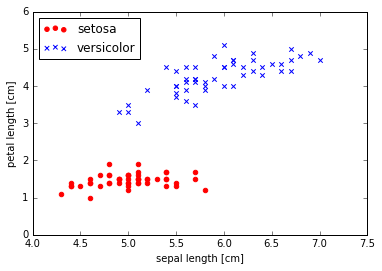

In [7]:
#plot data
# We can see that a linear decision boundary should be sufficient to seperate Setosa and versicolor flowers
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
#plt.show()

In [8]:
#importing class from file Perceptron.py in current working directory
from Perceptron import Perceptron

In [9]:
# instantiating our Perceptron class
ppn = Perceptron(eta = 0.1, n_iter = 10)

In [10]:
#fit perceptron model
ppn.fit(X, y)

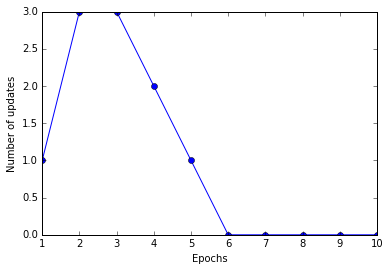

In [11]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
#plt.show()
#convergence after the 6th epoch

In [12]:
import PlotDecisionRegions

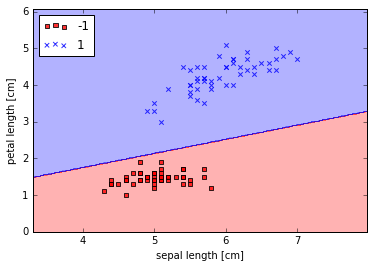

In [13]:
PlotDecisionRegions.plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
#plt.show()

# Illustrating Adaline with different learning rates

In [22]:
from AdalineGD import AdalineGD
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)

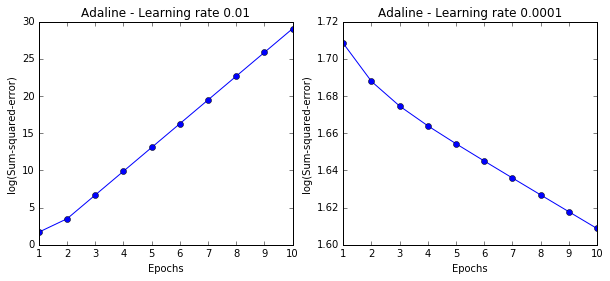

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')
#plt.show()


# Left shows what happens when learning rate is too large(error grows with epoch)

# Standardization 

In [24]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] =(X[:,1] - X[:,1].mean()) / X[:,1].std()

# Now run Adaline again and compare convergence 

In [25]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)


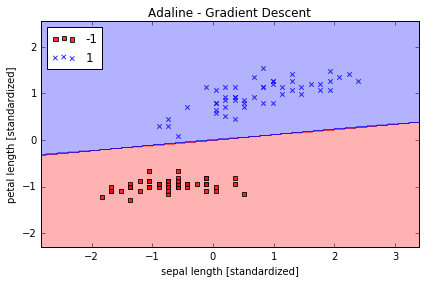

In [28]:
PlotDecisionRegions.plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.show()

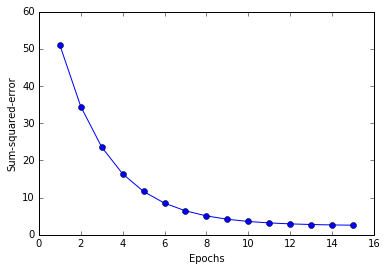

In [29]:
plt.plot(range(1, len(ada.cost_) + 1 ), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

# Now with stochastic gradient

In [30]:
from AdalineSGD import AdalineSGD
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

# We can see that average cost goes down quickly
## if we wanted to update our model in an online learning scenario with streaming data,
## we could call partial_fit method on individual samples
## ex. ada.partial_fit(X_std[0, :], y[0])

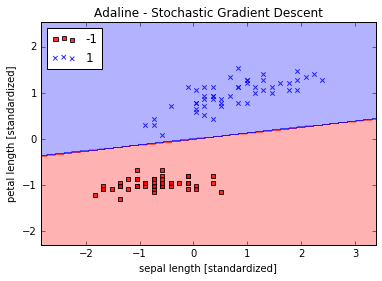

In [32]:
PlotDecisionRegions.plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
#plt.show()


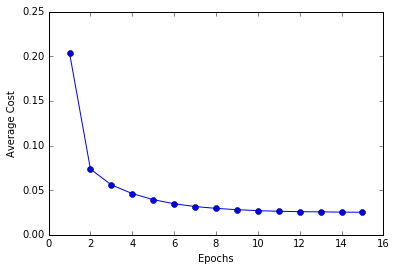

In [33]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
#plt.show()